# **Analysing Ticket Booking on Movie Monk with Tableau**

## **Aim**
To perform EDA on the Ticket booking on Movie Monk platform. You will be using Tableau Public / Desktop to answer the hidden questions and identify Key Performance Indicators.
You will learn certain data cleaning and manipulation actions while drawing insights from the dataset. On completing you are expected to share your views along with Story.



## **Problem Statement**
Tableau is the industrialist recommended visualization tool that can help performing analysis with a lot easy to go objects.
Creating charts and dashboards here are way to easy as compared with excel files. Not only that you can perform data formatting a lot faster. For trial versions, you can work on dataset up to 10GB while for paid tableau licences this number can go up to 100GB. 
Writing a code to make an analysis is time consuming while performing the same task to generate charts related to your queries can be a lot faster in tableau.
Its all-time favourite for the no techies who would like to show KPI’s and dashboards to their managers or to the customers. Looking at the viz can be more eye catching as compared to looking at the tables.
There are various tasks that can be performed with tableau. Starting from simple charts to time series analysis, or starting from showing simple aggregate measures to make trend or forecast about the datasets.

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

**Loading all the daset one-by-one**

In [2]:
#loading the datasets -> Booking Data
df1_Bookings=pd.read_excel("Movie_Monk.xlsx",sheet_name='bookings')

In [3]:
df1_Bookings.head()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue
0,1,1,96,3,2,NaN,15,2,NaN,2,NaN
1,2,2,262,3,1,NaN,15,2,NaN,2,NaN
2,3,3,64,3,1,NaN,15,2,NaN,2,NaN
3,4,4,168,3,3,NaN,15,2,10.0,2,NaN
4,5,5,11,3,1,NaN,15,2,NaN,2,NaN


In [4]:
df1_Bookings.shape

(1800, 11)

In [5]:
#loading the datasets -> Customer data
df2_Customer=pd.read_excel("Movie_Monk.xlsx",sheet_name='customer')

In [6]:
df2_Customer.head()

,Customer_Key,Name,Address,City,Zip,State,Country
0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US
1,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US
2,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US
3,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US
4,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US


In [7]:
#loading the datasets -> Due_date data
df3_Due_date=pd.read_excel("Movie_Monk.xlsx",sheet_name='due date')

In [8]:
df3_Due_date.head()

,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name
0,1,2019-01-01,2019,1,1,1,1,3,January,Tuesday
1,2,2019-01-02,2019,1,2,1,1,4,January,Tuesday
2,3,2019-01-03,2019,1,3,1,1,5,January,Tuesday
3,4,2019-01-04,2019,1,4,1,1,6,January,Tuesday
4,5,2019-01-05,2019,1,5,1,1,7,January,Tuesday


In [9]:
#loading the datasets -> Movies data
df4_Movies=pd.read_excel("Movie_Monk.xlsx",sheet_name='movies')

In [10]:
df4_Movies.head()

,Movie_Key,Title,Rating,Genre
0,1,"molestie in,tempus eu",5,Romance
1,2,netus et malesuada fames,1,Romance
2,3,Morbi neque,1,Action
3,4,ac mi eleifend,1,Thriller
4,5,iaculis enim sit,4,Comedy


In [11]:
#loading the datasets -> Theater data
df5_Theater=pd.read_excel("Movie_Monk.xlsx",sheet_name='theater')

In [12]:
df5_Theater.head()

,Theater_Key,Theater_Name,Theater_ParentGroup,Country,State,City,ZipCode
0,1,Curabitur Ltd,Century,US,ON,Whitby,81324
1,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101
2,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959
3,4,Sed Hendrerit A Corp.,Century,US,X,Hofors,50277
4,5,Eleifend Corporation,AMC,US,Provence-Alpes-Côte d'Azur,Cannes,51130


In [13]:
#loading the datasets -> Promocode data
df6_Promocode=pd.read_excel("Movie_Monk.xlsx",sheet_name='promocode')

In [14]:
df6_Promocode.head()

,PromoCode_Key,PromoCode
0,1,UEJ00IDU8PU
1,2,HKG83EGW9QK
2,3,RBU66DZN5NX
3,4,UTR52WBE4KW
4,5,IJO12KKK5HL


In [15]:
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)
#df.head()

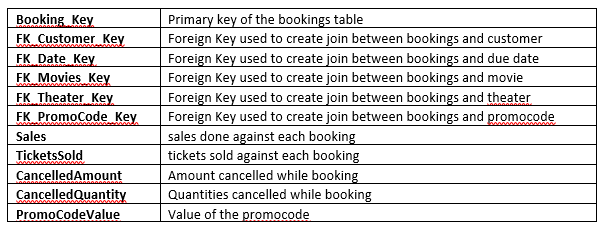

In [16]:
df1 = pd.merge(df1_Bookings,df2_Customer,left_on='FK_Customer_Key',right_on='Customer_Key',how='left')

df2 = pd.merge(df1,df3_Due_date,left_on='FK_Date_Key',right_on='date_key',how='left')

df3 = pd.merge(df2,df4_Movies,left_on='FK_Movies_Key',right_on='Movie_Key',how='left')

df4 = pd.merge(df3,df5_Theater,left_on='FK_Theater_Key',right_on='Theater_Key',how='left')

df = pd.merge(df4,df6_Promocode,left_on='FK_PromoCode_Key',right_on='PromoCode_Key',how='left')
df.head()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Name,Address,City_x,Zip,State_x,Country_x,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name,Movie_Key,Title,Rating,Genre,Theater_Key,Theater_Name,Theater_ParentGroup,Country_y,State_y,City_y,ZipCode,PromoCode_Key,PromoCode
0,1,1,96,3,2,NaN,15,2,NaN,2,NaN,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US,96,2019-04-06,2019,4,6,14,2,7,April,Tuesday,3,Morbi neque,1,Action,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101,NaN,NaN
1,2,2,262,3,1,NaN,15,2,NaN,2,NaN,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US,262,2019-09-19,2019,9,19,38,3,5,September,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,NaN,NaN
2,3,3,64,3,1,NaN,15,2,NaN,2,NaN,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US,64,2019-03-05,2019,3,5,10,1,3,March,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,NaN,NaN
3,4,4,168,3,3,NaN,15,2,10.0,2,NaN,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US,168,2019-06-17,2019,6,17,25,2,2,June,Tuesday,3,Morbi neque,1,Action,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959,NaN,NaN
4,5,5,11,3,1,NaN,15,2,NaN,2,NaN,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US,11,2019-01-11,2019,1,11,2,1,6,January,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,NaN,NaN


In [17]:
# join the Dataset
#df = pd.concat([df1_Bookings,df2_Customer,df3_Due_date,df4_Movies,df5_Theater,df6_Promocode], axis=1)
#df.head()

In [18]:
df.shape

(1800, 41)

In [19]:
df.describe()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Zip,date_key,year,month,day,week,quarter,day_in_week,Movie_Key,Rating,Theater_Key,ZipCode,PromoCode_Key
count,1800.00000,1800.00000,1800.000000,1800.000000,1800.000000,275.000000,1800.000000,1800.000000,20.000000,1800.000000,275.0,1800.00000,1800.000000,1800.000000,1800.0,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,275.000000
mean,900.50000,900.50000,158.098333,1.994444,3.981111,7.909091,34.166667,3.500000,28.000000,3.500000,5.0,900.50000,55545.710000,158.098333,2019.0,5.710556,15.666111,23.293333,2.277222,4.045000,1.994444,2.355556,3.981111,48178.951667,7.909091
std,519.75956,519.75956,92.884268,0.820101,1.652286,1.784695,11.337709,1.118345,12.290347,1.118345,0.0,519.75956,25906.207212,92.884268,0.0,3.065906,8.645650,13.263883,1.038092,1.962596,0.820101,1.893854,1.652286,14570.207997,1.784695
min,1.00000,1.00000,2.000000,1.000000,1.000000,5.000000,15.000000,2.000000,10.000000,2.000000,5.0,1.00000,11196.000000,2.000000,2019.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25959.000000,5.000000
25%,450.75000,450.75000,79.000000,1.000000,3.000000,5.000000,23.750000,2.750000,18.750000,2.750000,5.0,450.75000,32558.000000,79.000000,2019.0,3.000000,8.000000,12.000000,1.000000,2.000000,1.000000,1.000000,3.000000,39070.000000,5.000000
50%,900.50000,900.50000,154.500000,2.000000,4.000000,9.000000,32.500000,3.500000,27.500000,3.500000,5.0,900.50000,55091.000000,154.500000,2019.0,6.000000,16.000000,23.000000,2.000000,4.000000,2.000000,1.000000,4.000000,50277.000000,9.000000
75%,1350.25000,1350.25000,239.000000,3.000000,5.000000,9.000000,41.250000,4.250000,40.000000,4.250000,5.0,1350.25000,78681.750000,239.000000,2019.0,8.000000,23.000000,35.000000,3.000000,6.000000,3.000000,5.000000,5.000000,51130.000000,9.000000
max,1800.00000,1800.00000,320.000000,3.000000,6.000000,9.000000,50.000000,5.000000,45.000000,5.000000,5.0,1800.00000,99914.000000,320.000000,2019.0,11.000000,31.000000,46.000000,4.000000,7.000000,3.000000,5.000000,6.000000,81324.000000,9.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Booking_Key          1800 non-null   int64         
 1   FK_Customer_Key      1800 non-null   int64         
 2   FK_Date_Key          1800 non-null   int64         
 3   FK_Movies_Key        1800 non-null   int64         
 4   FK_Theater_Key       1800 non-null   int64         
 5   FK_PromoCode_Key     275 non-null    float64       
 6   Sales                1800 non-null   int64         
 7   TicketsSold          1800 non-null   int64         
 8   CancelledAmount      20 non-null     float64       
 9   CancelledQuantity    1800 non-null   int64         
 10  PromoCodeValue       275 non-null    float64       
 11  Customer_Key         1800 non-null   int64         
 12  Name                 1800 non-null   object        
 13  Address              1800 non-nul

In [21]:
df.isnull().sum()

Booking_Key               0
FK_Customer_Key           0
FK_Date_Key               0
FK_Movies_Key             0
FK_Theater_Key            0
FK_PromoCode_Key       1525
Sales                     0
TicketsSold               0
CancelledAmount        1780
CancelledQuantity         0
PromoCodeValue         1525
Customer_Key              0
Name                      0
Address                   0
City_x                    0
Zip                       0
State_x                   3
Country_x                 0
date_key                  0
date                      0
year                      0
month                     0
day                       0
week                      0
quarter                   0
day_in_week               0
month_name                0
day_name                  0
Movie_Key                 0
Title                     0
Rating                    0
Genre                     0
Theater_Key               0
Theater_Name              0
Theater_ParentGroup       0
Country_y           

**Filling the Missing Values**

In [22]:
# int
df["FK_PromoCode_Key"] = df["FK_PromoCode_Key"].fillna(df["FK_PromoCode_Key"].mean())
df["CancelledAmount"] = df["CancelledAmount"].fillna(df["CancelledAmount"].mean())
df["PromoCodeValue"] = df["PromoCodeValue"].fillna(df["PromoCodeValue"].mean())
df["PromoCode_Key"] = df["PromoCode_Key"].fillna(df["PromoCode_Key"].mean())

In [23]:
#categ
df["PromoCode"] = df["PromoCode"].fillna(df["PromoCode"].mode()[0])
df["State_x"] =df["State_x"].fillna(df["State_x"].mode()[0])

In [24]:
df.head(3)

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Name,Address,City_x,Zip,State_x,Country_x,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name,Movie_Key,Title,Rating,Genre,Theater_Key,Theater_Name,Theater_ParentGroup,Country_y,State_y,City_y,ZipCode,PromoCode_Key,PromoCode
0,1,1,96,3,2,7.909091,15,2,28.0,2,5.0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US,96,2019-04-06,2019,4,6,14,2,7,April,Tuesday,3,Morbi neque,1,Action,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101,7.909091,GFD75ZEB4MV
1,2,2,262,3,1,7.909091,15,2,28.0,2,5.0,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US,262,2019-09-19,2019,9,19,38,3,5,September,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV
2,3,3,64,3,1,7.909091,15,2,28.0,2,5.0,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US,64,2019-03-05,2019,3,5,10,1,3,March,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV


In [25]:
df.isnull().sum()

Booking_Key            0
FK_Customer_Key        0
FK_Date_Key            0
FK_Movies_Key          0
FK_Theater_Key         0
FK_PromoCode_Key       0
Sales                  0
TicketsSold            0
CancelledAmount        0
CancelledQuantity      0
PromoCodeValue         0
Customer_Key           0
Name                   0
Address                0
City_x                 0
Zip                    0
State_x                0
Country_x              0
date_key               0
date                   0
year                   0
month                  0
day                    0
week                   0
quarter                0
day_in_week            0
month_name             0
day_name               0
Movie_Key              0
Title                  0
Rating                 0
Genre                  0
Theater_Key            0
Theater_Name           0
Theater_ParentGroup    0
Country_y              0
State_y                0
City_y                 0
ZipCode                0
PromoCode_Key          0


### Rename the Column ["Theater data"] and [" Customer data"]

City_x, City_y

State_x,State_y, 

Country_x,Country_y,

In [26]:
df2_Customer.head()

,Customer_Key,Name,Address,City,Zip,State,Country
0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US
1,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US
2,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US
3,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US
4,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US


In [27]:
df5_Theater.head()

,Theater_Key,Theater_Name,Theater_ParentGroup,Country,State,City,ZipCode
0,1,Curabitur Ltd,Century,US,ON,Whitby,81324
1,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101
2,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959
3,4,Sed Hendrerit A Corp.,Century,US,X,Hofors,50277
4,5,Eleifend Corporation,AMC,US,Provence-Alpes-Côte d'Azur,Cannes,51130


In [28]:
#Renaming the columns ["Theater data"] and [" Customer data"]
df.rename(columns = {'City_x':'City_Customer',
                           'State_x':'State_Customer',
                           'Country_x':'Country_Customer',

                           'Country_y':'Country_Theater',
                           'State_y':'State_Theater',
                           'City_y':'City_Theater'}, inplace = True)
df.head()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Name,Address,City_Customer,Zip,State_Customer,Country_Customer,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name,Movie_Key,Title,Rating,Genre,Theater_Key,Theater_Name,Theater_ParentGroup,Country_Theater,State_Theater,City_Theater,ZipCode,PromoCode_Key,PromoCode
0,1,1,96,3,2,7.909091,15,2,28.0,2,5.0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US,96,2019-04-06,2019,4,6,14,2,7,April,Tuesday,3,Morbi neque,1,Action,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101,7.909091,GFD75ZEB4MV
1,2,2,262,3,1,7.909091,15,2,28.0,2,5.0,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US,262,2019-09-19,2019,9,19,38,3,5,September,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV
2,3,3,64,3,1,7.909091,15,2,28.0,2,5.0,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US,64,2019-03-05,2019,3,5,10,1,3,March,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV
3,4,4,168,3,3,7.909091,15,2,10.0,2,5.0,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US,168,2019-06-17,2019,6,17,25,2,2,June,Tuesday,3,Morbi neque,1,Action,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959,7.909091,GFD75ZEB4MV
4,5,5,11,3,1,7.909091,15,2,28.0,2,5.0,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US,11,2019-01-11,2019,1,11,2,1,6,January,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV


In [29]:
df.shape

(1800, 41)

In [30]:
df['Ovrall_ID'] = df.index
df.head()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Name,Address,City_Customer,Zip,State_Customer,Country_Customer,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name,Movie_Key,Title,Rating,Genre,Theater_Key,Theater_Name,Theater_ParentGroup,Country_Theater,State_Theater,City_Theater,ZipCode,PromoCode_Key,PromoCode,Ovrall_ID
0,1,1,96,3,2,7.909091,15,2,28.0,2,5.0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US,96,2019-04-06,2019,4,6,14,2,7,April,Tuesday,3,Morbi neque,1,Action,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101,7.909091,GFD75ZEB4MV,0
1,2,2,262,3,1,7.909091,15,2,28.0,2,5.0,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US,262,2019-09-19,2019,9,19,38,3,5,September,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,1
2,3,3,64,3,1,7.909091,15,2,28.0,2,5.0,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US,64,2019-03-05,2019,3,5,10,1,3,March,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,2
3,4,4,168,3,3,7.909091,15,2,10.0,2,5.0,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US,168,2019-06-17,2019,6,17,25,2,2,June,Tuesday,3,Morbi neque,1,Action,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959,7.909091,GFD75ZEB4MV,3
4,5,5,11,3,1,7.909091,15,2,28.0,2,5.0,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US,11,2019-01-11,2019,1,11,2,1,6,January,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,4


In [31]:
df.shape

(1800, 42)

In [32]:
# converting the cleaned data to csv file
df.to_csv('Preprocess_final_data.csv',index=False)

In [33]:
data = pd.read_csv("/content/Preprocess_final_data.csv")
data.head()

,Booking_Key,FK_Customer_Key,FK_Date_Key,FK_Movies_Key,FK_Theater_Key,FK_PromoCode_Key,Sales,TicketsSold,CancelledAmount,CancelledQuantity,PromoCodeValue,Customer_Key,Name,Address,City_Customer,Zip,State_Customer,Country_Customer,date_key,date,year,month,day,week,quarter,day_in_week,month_name,day_name,Movie_Key,Title,Rating,Genre,Theater_Key,Theater_Name,Theater_ParentGroup,Country_Theater,State_Theater,City_Theater,ZipCode,PromoCode_Key,PromoCode,Ovrall_ID
0,1,1,96,3,2,7.909091,15,2,28.0,2,5.0,1,Eugenia Simon,1593 Proin Av.,Timaru,71686,South Island,US,96,2019-04-06,2019,4,6,14,2,7,April,Tuesday,3,Morbi neque,1,Action,2,Velit Pellentesque Ultricies LLP,Century,US,MI,Flint,40101,7.909091,GFD75ZEB4MV,0
1,2,2,262,3,1,7.909091,15,2,28.0,2,5.0,2,Daryl Petty,121-3812 Faucibus. Rd.,Leominster,65925,HE,US,262,2019-09-19,2019,9,19,38,3,5,September,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,1
2,3,3,64,3,1,7.909091,15,2,28.0,2,5.0,3,Deborah Tran,"5166 In, Av.",Amstelveen,64459,Noord Holland,US,64,2019-03-05,2019,3,5,10,1,3,March,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,2
3,4,4,168,3,3,7.909091,15,2,10.0,2,5.0,4,Macy Acevedo,250 Sem Street,Minna,88009,Niger,US,168,2019-06-17,2019,6,17,25,2,2,June,Tuesday,3,Morbi neque,1,Action,3,Ullamcorper Magna Incorporated,Century,US,LX,Bastogne,25959,7.909091,GFD75ZEB4MV,3
4,5,5,11,3,1,7.909091,15,2,28.0,2,5.0,5,Tatyana Kelley,"196-2531 Pellentesque, St.",Burnie,48560,TAS,US,11,2019-01-11,2019,1,11,2,1,6,January,Tuesday,3,Morbi neque,1,Action,1,Curabitur Ltd,Century,US,ON,Whitby,81324,7.909091,GFD75ZEB4MV,4


In [35]:
data.shape  # Expected Shape

(1800, 42)